In [82]:
import pandas as pd
import numpy as np

data_path = 'filtered_natural_science_data.csv'
data = pd.read_csv(data_path, low_memory=False)

data.head(20)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,CLASSIFICATION,Classification,DECIMALS,Decimals
0,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,6.723344e+04,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
1,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,6.349291e+04,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
2,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,7.293352e+04,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
3,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,8.970398e+04,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
4,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,9.593516e+04,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
5,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,1.090031e+05,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
6,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,1.893485e+06,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
7,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,3.294042e+05,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
8,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,2.030996e+05,NaN,NaN,NaN,0,Units,F,F,0.0,Zero
9,DATAFLOW,OECD.SDD.NAD.SEEA:DSD_AIR_TRANSPORT@DF_AIR_TRA...,Air transport CO2 emissions (experimental),I,CHN,China (People’s Republic of),A,Annual,EMISSIONS,Emissions,...,1.956626e+05,NaN,NaN,NaN,0,Units,F,F,0.0,Zero


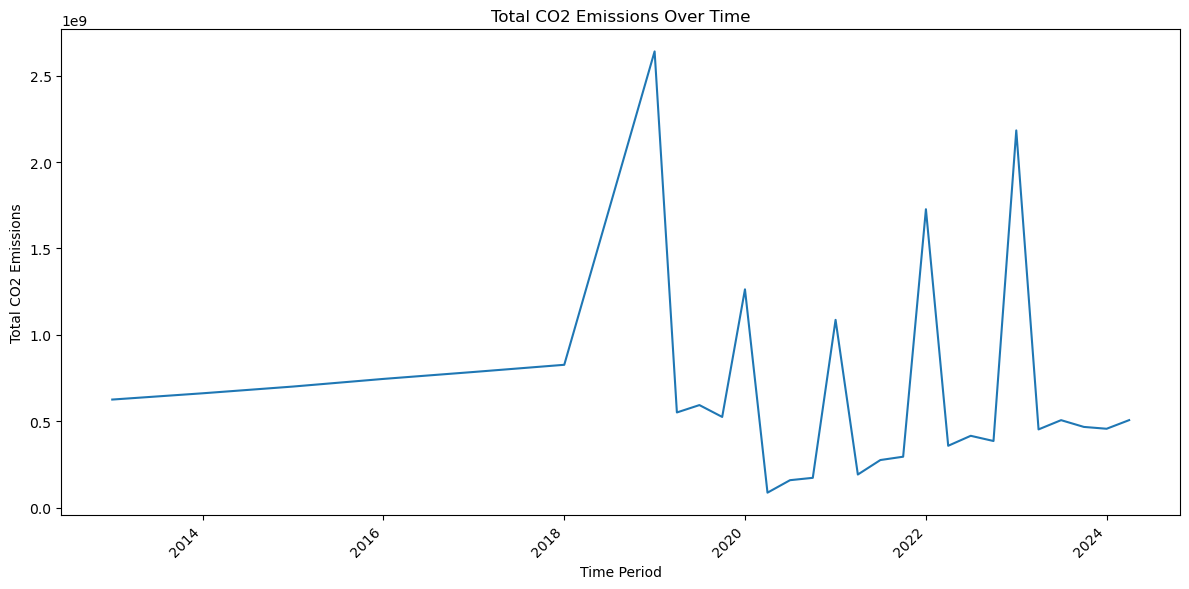

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = 'filtered_natural_science_data.csv'
data = pd.read_csv(data_path, low_memory=False)

# Function to parse TIME_PERIOD
def parse_time_period(time_str):
    try:
        # If it's just a year
        return pd.to_datetime(time_str, format='%Y')
    except ValueError:
        try:
            # If it's in YYYY-QN format
            year, quarter = time_str.split('-Q')
            return pd.to_datetime(f"{year}-{int(quarter)*3-2}-01")
        except ValueError:
            # If it's in a different format, return NaT
            return pd.NaT

# Convert TIME_PERIOD to datetime
data['TIME_PERIOD'] = data['TIME_PERIOD'].apply(parse_time_period)

# Convert OBS_VALUE to numeric
data['OBS_VALUE'] = pd.to_numeric(data['OBS_VALUE'], errors='coerce')

# Remove rows with NaT in TIME_PERIOD or NaN in OBS_VALUE
data = data.dropna(subset=['TIME_PERIOD', 'OBS_VALUE'])

# Sort the data
data = data.sort_values('TIME_PERIOD')

# Group and plot
grouped_data = data.groupby('TIME_PERIOD')['OBS_VALUE'].sum()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='line')
plt.title('Total CO2 Emissions Over Time')
plt.xlabel('Time Period')
plt.ylabel('Total CO2 Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


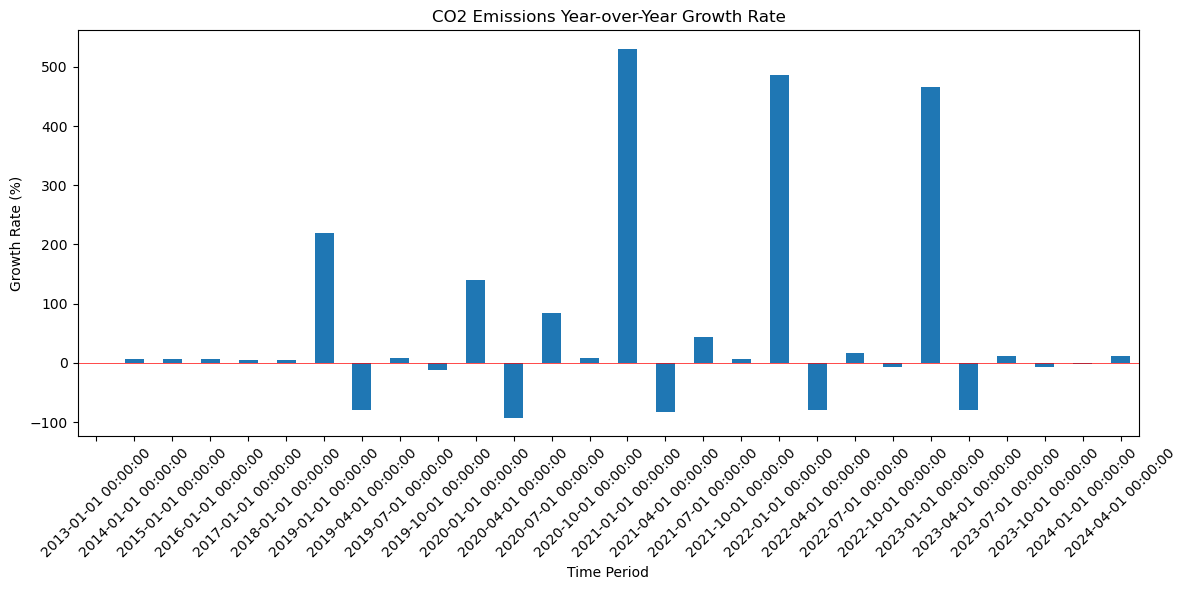

TIME_PERIOD
2013-01-01           NaN
2014-01-01      5.799615
2015-01-01      5.893733
2016-01-01      6.309936
2017-01-01      5.408513
2018-01-01      5.282081
2019-01-01    219.461927
2019-04-01    -79.145393
2019-07-01      7.750029
2019-10-01    -11.559053
2020-01-01    140.720642
2020-04-01    -93.155462
2020-07-01     83.488123
2020-10-01      8.609162
2021-01-01    530.672429
2021-04-01    -82.383900
2021-07-01     43.804826
2021-10-01      6.992189
2022-01-01    486.347327
2022-04-01    -79.281545
2022-07-01     16.133207
2022-10-01     -7.246147
2023-01-01    466.449913
2023-04-01    -79.268742
2023-07-01     11.815818
2023-10-01     -7.730147
2024-01-01     -2.273589
2024-04-01     10.947989
Name: OBS_VALUE, dtype: float64


In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate year-over-year growth rate
growth_rate = grouped_data.pct_change() * 100

# Create a new figure for the growth rate plot
plt.figure(figsize=(12, 6))
growth_rate.plot(kind='bar')
plt.title('CO2 Emissions Year-over-Year Growth Rate')
plt.xlabel('Time Period')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()
plt.show()

# Print the growth rates
print(growth_rate)

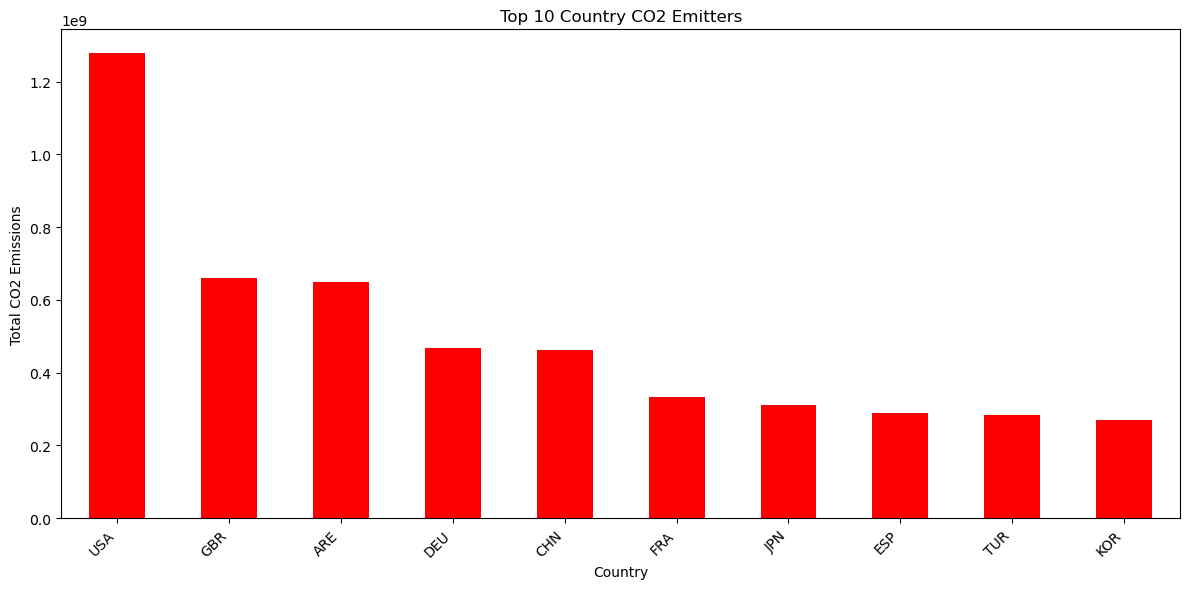

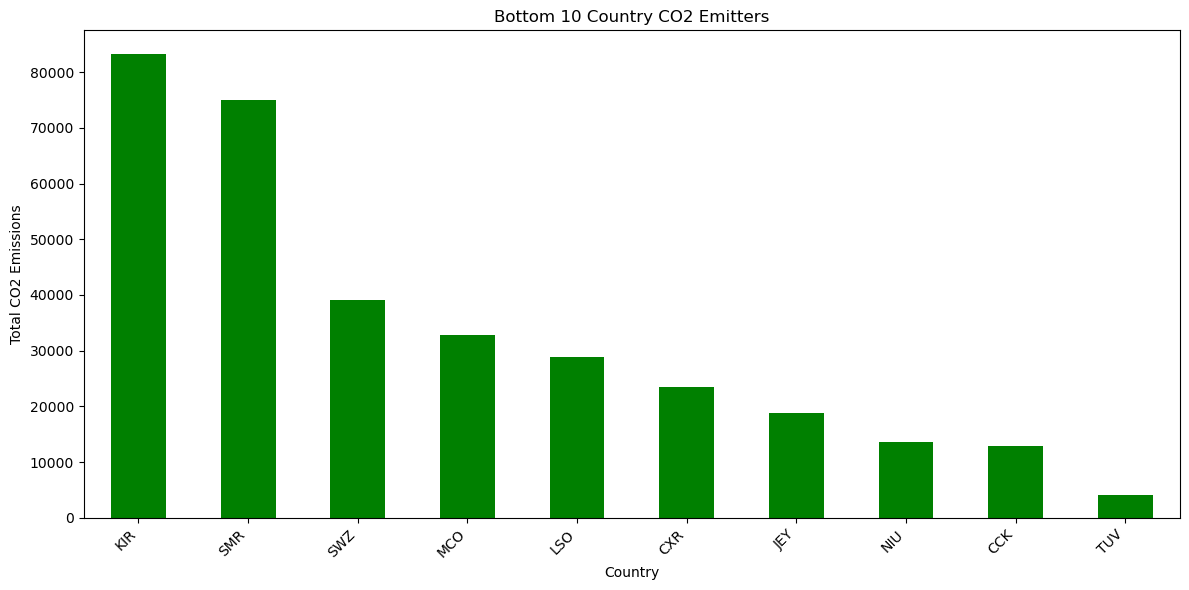

Top 10 Country Emitters:
REF_AREA
USA    1.279368e+09
GBR    6.612259e+08
ARE    6.498295e+08
DEU    4.684002e+08
CHN    4.617006e+08
FRA    3.335282e+08
JPN    3.103073e+08
ESP    2.894492e+08
TUR    2.830513e+08
KOR    2.707154e+08
Name: OBS_VALUE, dtype: float64

Bottom 10 Country Emitters:
REF_AREA
KIR    83356.953540
SMR    75056.854576
SWZ    39025.589610
MCO    32789.137593
LSO    28830.391555
CXR    23511.944839
JEY    18879.149765
NIU    13655.601743
CCK    12806.074811
TUV     4124.799367
Name: OBS_VALUE, dtype: float64


In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your original DataFrame

# List of aggregate categories to exclude
exclude_list = ['W', 'OECD', 'EU27_2020', 'G20', 'G7', 'EUTA']  # Add any other aggregate categories

# Filter out aggregate categories
country_data = data[~data['REF_AREA'].isin(exclude_list)]

# Group by country and sum emissions
total_emissions = country_data.groupby('REF_AREA')['OBS_VALUE'].sum().sort_values(ascending=False)

# Get top 10 and bottom 10 country emitters
top_10 = total_emissions.head(10)
bottom_10 = total_emissions.tail(10)

# Function to plot emitters (same as before)
def plot_emitters(data, title, color):
    plt.figure(figsize=(12, 6))
    data.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel('Country')
    plt.ylabel('Total CO2 Emissions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot and print results
plot_emitters(top_10, 'Top 10 Country CO2 Emitters', 'red')
plot_emitters(bottom_10, 'Bottom 10 Country CO2 Emitters', 'green')

print("Top 10 Country Emitters:")
print(top_10)
print("\nBottom 10 Country Emitters:")
print(bottom_10)